# Ссылка на данные:
* https://www.kaggle.com/datasets/joonasyoon/clustering-exercises

## Пример 1 (SINGLE)

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("dark_background")
# plt.style.use('seaborn-v0_8-white')
pd.options.display.max_rows = 50
pd.options.display.max_columns = 120
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Читаем данные
df = pd.read_csv('basic1.csv')
df.head()

x           y  color
0   79.408289  152.834424      0
1   98.046263  186.910700      0
2  240.578979   48.473684      1
3  109.687183  277.945769      0
4  249.626082  229.753352      1

In [3]:
# Состав кластеров по умолчанию
df['color'].value_counts()

0    3816
1    2646
2    2156
3    1176
Name: color, dtype: int64

In [4]:
df_work = df.iloc[:, :-1]
df_work.head()

x           y
0   79.408289  152.834424
1   98.046263  186.910700
2  240.578979   48.473684
3  109.687183  277.945769
4  249.626082  229.753352

In [5]:
# Импортируем необходимые библиотеки
from sklearn import preprocessing # стандартизация
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster # иерархический кластерный анализ

In [6]:
# Выбираем стандартизацию
norm = preprocessing.StandardScaler()
# norm = preprocessing.MaxAbsScaler()
# norm = preprocessing.MinMaxScaler()

In [7]:
# Проводим стандартизацию
X = norm.fit_transform(df_work)

In [8]:
# Преобразуем полученный массив данных в объект pandas
X = pd.DataFrame(X, index = df_work.index, columns = df_work.columns)
X.head()

x         y
0 -1.201420 -0.718618
1 -1.068717 -0.373592
2 -0.053878 -1.775284
3 -0.985833  0.548150
4  0.010538  0.060196

In [9]:
# Кластеризуем

link = linkage(X, method = 'single', metric = 'euclidean')

# method = 'single' - метод ближайшего соседа
# method = 'complete' - метод дальнего соседа
# method = 'average' - метод невзвешенных парных групп со средним арифметическим (UPGMA)
# method = 'weighted' -  метод взвешенных парных групп со средним арифметическим (WPGMA)
# method = 'centroid' - метод невзвешенных парных групп с центроидами (UPGMC)
# method = 'median' - метод взвешенных парных групп с медоидами (WPGMC)
# method = 'ward' - метод Уорда

# metrics:
# braycurtis, canberra, chebyshev, cityblock,
# correlation, cosine, dice, euclidean, hamming,
# jaccard, jensenshannon, kulczynski1, mahalanobis,
# matching, minkowski, rogerstanimoto, russellrao,
# seuclidean, sokalmichener, sokalsneath, sqeuclidean, yule

Text(0, 0.5, 'РАССТОЯНИЕ ОБЪЕДИНЕНИЯ')

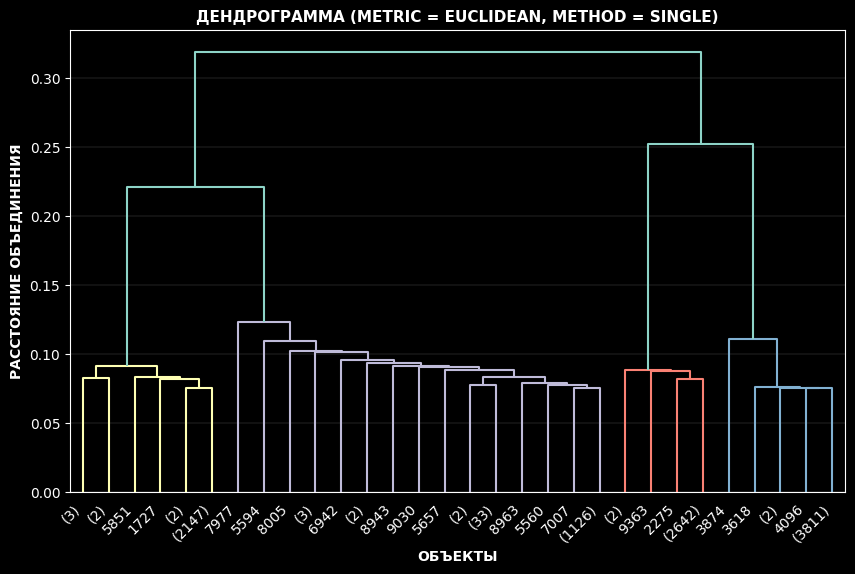

In [10]:
# Строим дендрограмму
fig, ax = plt.subplots(figsize = (10, 6))
# ax.set(ylim = (0, 150), yticks = np.arange(0, 150, 20))
ax.set_xticklabels(labels = 'x', rotation = 45, ha = 'right')
ax.grid(axis = 'y', color = 'white', linestyle = '-', linewidth = 0.1)
dn = dendrogram(link,
                labels = X.index.tolist(),
                color_threshold = 0.15,               # - указываем где разграничить по цветам (-1 не раскрашивать)
                truncate_mode = 'lastp')            # - более красивая визуализация слишком ветвистых кластеров
ax.set_title('ДЕНДРОГРАММА (METRIC = EUCLIDEAN, METHOD = SINGLE)', fontsize = 11, fontweight = 800)
ax.set_xlabel('ОБЪЕКТЫ', fontsize = 10, fontweight = 800)
ax.set_ylabel('РАССТОЯНИЕ ОБЪЕДИНЕНИЯ', fontsize = 10, fontweight = 800)

In [11]:
# Добавим столбец cluster с номерами кластеров в исходную таблицу и укажем когда прекратить объединение
df['cluster'] = fcluster(link, 4, criterion = 'maxclust')

Text(0.5, 1.0, 'ПОСЛЕ КЛАСТЕРИЗАЦИИ')

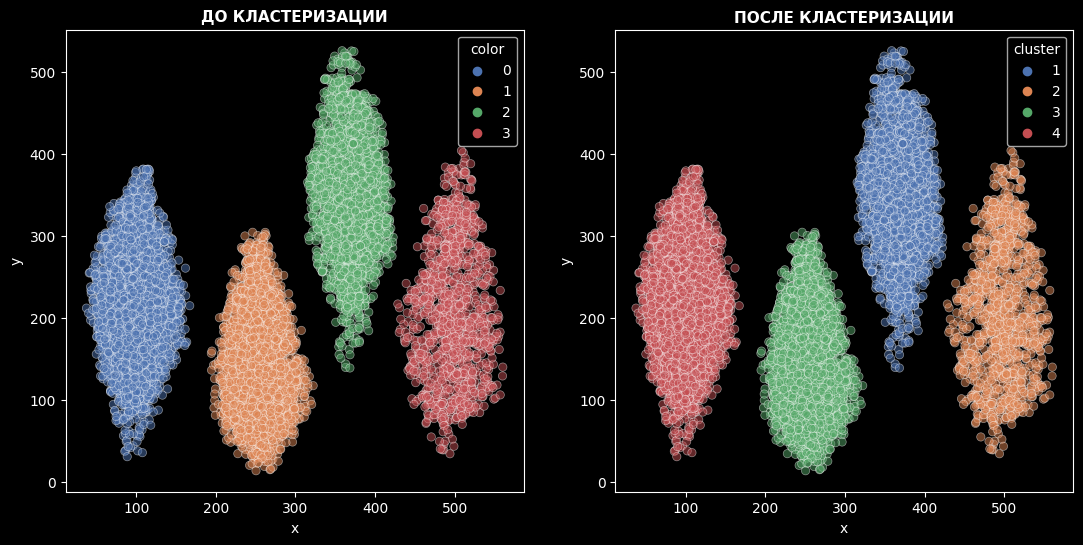

In [12]:
# Сравнение диаграмм рассеяния до и после кластеризации
fig, (ax1, ax2) = plt.subplots(figsize = (13, 6), nrows = 1, ncols = 2)
sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'color', palette = 'deep', alpha = .5, ax = ax1)
sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'cluster', palette = 'deep', alpha = .5, ax = ax2)
ax1.set_title('ДО КЛАСТЕРИЗАЦИИ', fontsize = 11, fontweight = 800)
ax2.set_title('ПОСЛЕ КЛАСТЕРИЗАЦИИ', fontsize = 11, fontweight = 800)

In [13]:
# Посмотрим сколько элементов в каждом кластере
df['cluster'].value_counts()

4    3816
3    2646
1    2156
2    1176
Name: cluster, dtype: int64

In [14]:
# Выведем таблицу сопряженностей для сравнения кластеризации
table = pd.crosstab(df['cluster'], df['color'])
table

color       0     1     2     3
cluster                        
1           0     0  2156     0
2           0     0     0  1176
3           0  2646     0     0
4        3816     0     0     0

## Пример 2 (SINGLE)

In [15]:
# Читаем данные
df = pd.read_csv('chrome.csv')
df.head()

x           y  color
0  317.614913  197.197881      2
1  187.085153  164.653509      0
2  245.989615  233.783184      2
3  356.170303  206.712568      2
4  424.640194  141.090956      1

In [16]:
# Состав кластеров по умолчанию
df['color'].value_counts()

2    4223
3    2682
1    2115
0    2073
Name: color, dtype: int64

In [17]:
df_work = df.iloc[:, :-1]
df_work.head()

x           y
0  317.614913  197.197881
1  187.085153  164.653509
2  245.989615  233.783184
3  356.170303  206.712568
4  424.640194  141.090956

In [18]:
# Проводим стандартизацию
X = norm.fit_transform(df_work)

In [19]:
# Преобразуем полученный массив данных в объект pandas
X = pd.DataFrame(X, index = df_work.index, columns = df_work.columns)
X.head()

x         y
0  0.274512 -0.103169
1 -1.726052 -0.584893
2 -0.823253  0.438368
3  0.865432  0.037668
4  1.914835 -0.933667

In [26]:
# Кластеризуем
link = linkage(X, method = 'single', metric = 'euclidean')

# method = 'single'    - метод ближайшего соседа
# method = 'complete'  - метод дальнего соседа
# method = 'average'   - метод невзвешенных парных групп со средним арифметическим (UPGMA)
# method = 'weighted'  - метод взвешенных парных групп со средним арифметическим (WPGMA)
# method = 'centroid'  - метод невзвешенных парных групп с центроидами (UPGMC)
# method = 'median'    - метод взвешенных парных групп с медоидами (WPGMC)
# method = 'ward'      - метод Уорда

# metrics:
# braycurtis, canberra, chebyshev, cityblock,
# correlation, cosine, dice, euclidean, hamming,
# jaccard, jensenshannon, kulczynski1, mahalanobis,
# matching, minkowski, rogerstanimoto, russellrao,
# seuclidean, sokalmichener, sokalsneath, sqeuclidean, yule

Text(0, 0.5, 'РАССТОЯНИЕ ОБЪЕДИНЕНИЯ')

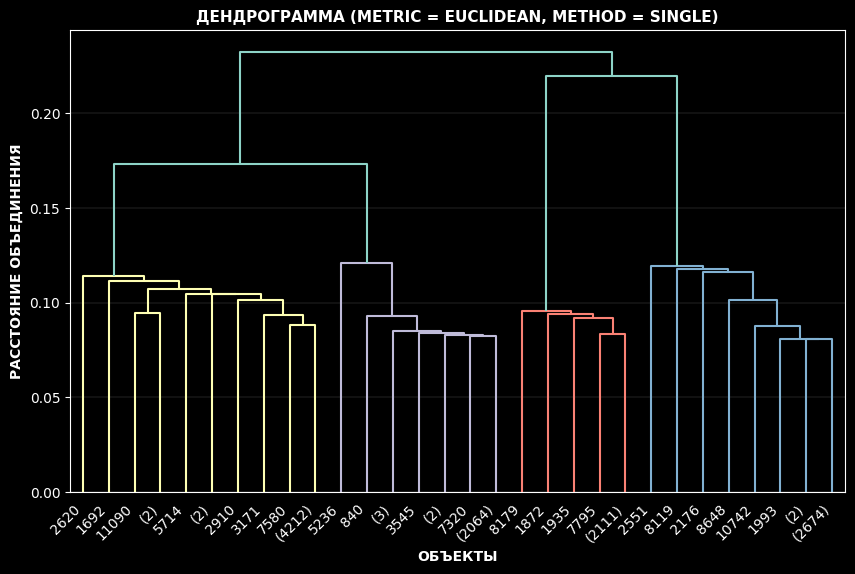

In [27]:
# Строим дендрограмму
fig, ax = plt.subplots(figsize = (10, 6))
# ax.set(ylim = (0, 150), yticks = np.arange(0, 150, 20))
ax.set_xticklabels(labels = 'x', rotation = 45, ha = 'right')
ax.grid(axis = 'y', color = 'white', linestyle = '-', linewidth = 0.1)
dn = dendrogram(link,
                labels = X.index.tolist(),
                color_threshold = 0.15,               # - указываем где разграничить по цветам (-1 не раскрашивать)
                truncate_mode = 'lastp')            # - более красивая визуализация слишком ветвистых кластеров
ax.set_title('ДЕНДРОГРАММА (METRIC = EUCLIDEAN, METHOD = SINGLE)', fontsize = 11, fontweight = 800)
ax.set_xlabel('ОБЪЕКТЫ', fontsize = 10, fontweight = 800)
ax.set_ylabel('РАССТОЯНИЕ ОБЪЕДИНЕНИЯ', fontsize = 10, fontweight = 800)

In [28]:
# Добавим столбец cluster с номерами кластеров в исходную таблицу и укажем когда прекратить объединение
df['cluster'] = fcluster(link, 4, criterion = 'maxclust')

Text(0.5, 1.0, 'ПОСЛЕ КЛАСТЕРИЗАЦИИ')

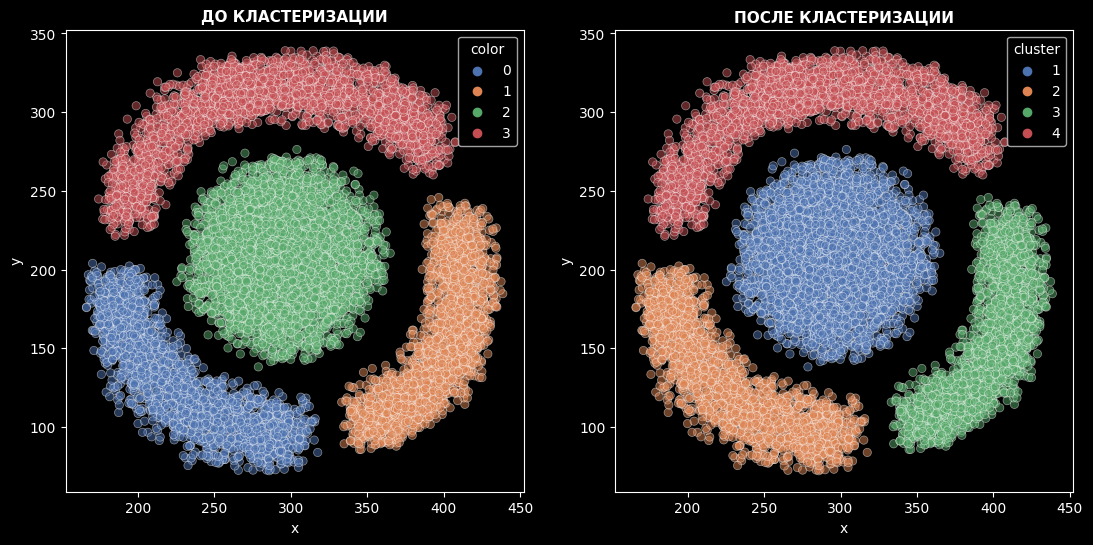

In [29]:
# Сравнение диаграмм рассеяния до и после кластеризации
fig, (ax1, ax2) = plt.subplots(figsize = (13, 6), nrows = 1, ncols = 2)
sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'color', palette = 'deep', alpha = .5, ax = ax1)
sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'cluster', palette = 'deep', alpha = .5, ax = ax2)
ax1.set_title('ДО КЛАСТЕРИЗАЦИИ', fontsize = 11, fontweight = 800)
ax2.set_title('ПОСЛЕ КЛАСТЕРИЗАЦИИ', fontsize = 11, fontweight = 800)

In [30]:
# Посмотрим сколько элементов в каждом кластере
df['cluster'].value_counts()

1    4223
4    2682
3    2115
2    2073
Name: cluster, dtype: int64

In [31]:
# Выведем таблицу сопряженностей для сравнения кластеризации
table = pd.crosstab(df['cluster'], df['color'])
table

color       0     1     2     3
cluster                        
1           0     0  4223     0
2        2073     0     0     0
3           0  2115     0     0
4           0     0     0  2682

## Пример 3 (WARD)

In [33]:
# Читаем данные
df = pd.read_csv('blob.csv')
df.head()

x           y  color
0  199.115034   72.641121      1
1  196.880523  247.744708      2
2   88.426271  233.962425      2
3  118.578789  264.044188      2
4  249.572490  260.896521      0

In [34]:
# Состав кластеров по умолчанию
df['color'].value_counts()

3    1055
2    1045
1    1019
0     967
Name: color, dtype: int64

In [35]:
df_work = df.iloc[:, :-1]
df_work.head()

x           y
0  199.115034   72.641121
1  196.880523  247.744708
2   88.426271  233.962425
3  118.578789  264.044188
4  249.572490  260.896521

In [36]:
# Проводим стандартизацию
X = norm.fit_transform(df_work)

In [37]:
# Преобразуем полученный массив данных в объект pandas
X = pd.DataFrame(X, index = df_work.index, columns = df_work.columns)
X.head()

x         y
0  0.141363 -1.631612
1  0.107193  1.064139
2 -1.551283  0.851958
3 -1.090192  1.315072
4  0.912956  1.266613

In [188]:
# Кластеризуем
link = linkage(X, method = 'ward', metric = 'euclidean')

# method = 'single'    - метод ближайшего соседа
# method = 'complete'  - метод дальнего соседа
# method = 'average'   - метод невзвешенных парных групп со средним арифметическим (UPGMA)
# method = 'weighted'  - метод взвешенных парных групп со средним арифметическим (WPGMA)
# method = 'centroid'  - метод невзвешенных парных групп с центроидами (UPGMC)
# method = 'median'    - метод взвешенных парных групп с медоидами (WPGMC)
# method = 'ward'      - метод Уорда

# metrics:
# braycurtis, canberra, chebyshev, cityblock,
# correlation, cosine, dice, euclidean, hamming,
# jaccard, jensenshannon, kulczynski1, mahalanobis,
# matching, minkowski, rogerstanimoto, russellrao,
# seuclidean, sokalmichener, sokalsneath, sqeuclidean, yule

Text(0, 0.5, 'РАССТОЯНИЕ ОБЪЕДИНЕНИЯ')

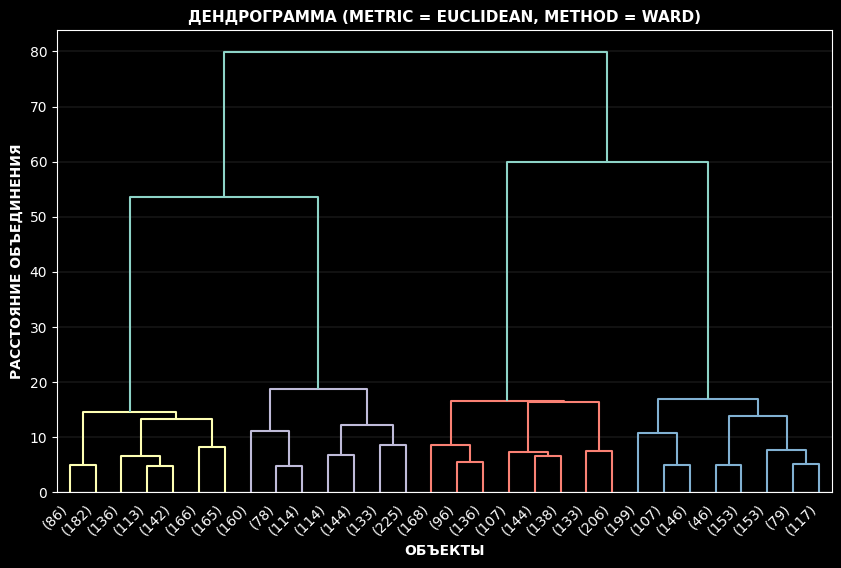

In [195]:
# Строим дендрограмму
fig, ax = plt.subplots(figsize = (10, 6))
# ax.set(ylim = (0, 150), yticks = np.arange(0, 150, 20))
ax.set_xticklabels(labels = 'x', rotation = 45, ha = 'right')
ax.grid(axis = 'y', color = 'white', linestyle = '-', linewidth = 0.1)
dn = dendrogram(link,
                labels = X.index.tolist(),
                color_threshold = 30.0,               # - указываем где разграничить по цветам (-1 не раскрашивать)
                truncate_mode = 'lastp')            # - более красивая визуализация слишком ветвистых кластеров
ax.set_title('ДЕНДРОГРАММА (METRIC = EUCLIDEAN, METHOD = WARD)', fontsize = 11, fontweight = 800)
ax.set_xlabel('ОБЪЕКТЫ', fontsize = 10, fontweight = 800)
ax.set_ylabel('РАССТОЯНИЕ ОБЪЕДИНЕНИЯ', fontsize = 10, fontweight = 800)

In [191]:
# Добавим столбец cluster с номерами кластеров в исходную таблицу и укажем когда прекратить объединение
df['cluster'] = fcluster(link, 4, criterion = 'maxclust')

Text(0.5, 1.0, 'ПОСЛЕ КЛАСТЕРИЗАЦИИ')

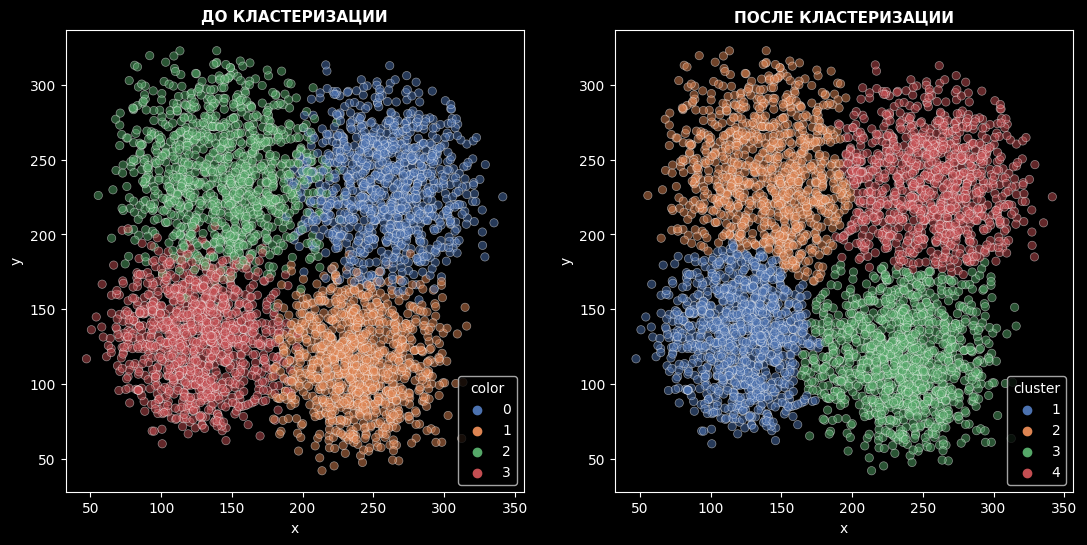

In [192]:
# Сравнение диаграмм рассеяния до и после кластеризации
fig, (ax1, ax2) = plt.subplots(figsize = (13, 6), nrows = 1, ncols = 2)
sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'color', palette = 'deep', alpha = .5, ax = ax1)
sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'cluster', palette = 'deep', alpha = .5, ax = ax2)
ax1.set_title('ДО КЛАСТЕРИЗАЦИИ', fontsize = 11, fontweight = 800)
ax2.set_title('ПОСЛЕ КЛАСТЕРИЗАЦИИ', fontsize = 11, fontweight = 800)

In [196]:
# Посмотрим сколько элементов в каждом кластере
df['cluster'].value_counts()

3    1128
4    1000
1     990
2     968
Name: cluster, dtype: int64

In [197]:
# Выведем таблицу сопряженностей для сравнения кластеризации
table = pd.crosstab(df['cluster'], df['color'])
table

color      0     1    2    3
cluster                     
1          0     0   39  951
2          6     0  931   31
3         36  1016    3   73
4        925     3   72    0

## Пример 4 (WARD)

In [198]:
# Читаем данные
df = pd.read_csv('boxes3.csv')
df.head()

x           y  color
0  400.806675  174.702750      6
1  401.154038   70.450386      0
2  294.722093   30.296820      4
3  415.366580   86.633522      0
4  181.464244   83.254630      1

In [199]:
# Состав кластеров по умолчанию
df['color'].value_counts()

1     2513
6     2497
7     1985
4     1841
8     1825
10    1810
5     1793
2     1777
9     1649
0     1569
3     1408
11     933
Name: color, dtype: int64

In [200]:
df_work = df.iloc[:, :-1]
df_work.head()

x           y
0  400.806675  174.702750
1  401.154038   70.450386
2  294.722093   30.296820
3  415.366580   86.633522
4  181.464244   83.254630

In [201]:
# Проводим стандартизацию
X = norm.fit_transform(df_work)

In [202]:
# Преобразуем полученный массив данных в объект pandas
X = pd.DataFrame(X, index = df_work.index, columns = df_work.columns)
X.head()

x         y
0  1.214985 -0.104280
1  1.217914 -1.232738
2  0.320479 -1.667372
3  1.337754 -1.057567
4 -0.634511 -1.094141

In [229]:
# Кластеризуем
link = linkage(X, method = 'ward', metric = 'euclidean')

# method = 'single'    - метод ближайшего соседа
# method = 'complete'  - метод дальнего соседа
# method = 'average'   - метод невзвешенных парных групп со средним арифметическим (UPGMA)
# method = 'weighted'  - метод взвешенных парных групп со средним арифметическим (WPGMA)
# method = 'centroid'  - метод невзвешенных парных групп с центроидами (UPGMC)
# method = 'median'    - метод взвешенных парных групп с медоидами (WPGMC)
# method = 'ward'      - метод Уорда

# metrics:
# braycurtis, canberra, chebyshev, cityblock,
# correlation, cosine, dice, euclidean, hamming,
# jaccard, jensenshannon, kulczynski1, mahalanobis,
# matching, minkowski, rogerstanimoto, russellrao,
# seuclidean, sokalmichener, sokalsneath, sqeuclidean, yule

Text(0, 0.5, 'РАССТОЯНИЕ ОБЪЕДИНЕНИЯ')

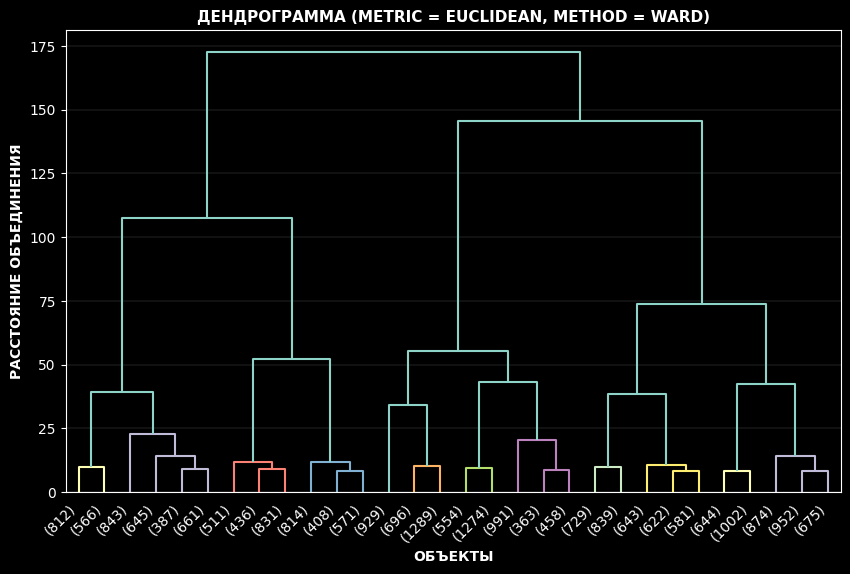

In [231]:
# Строим дендрограмму
fig, ax = plt.subplots(figsize = (10, 6))
# ax.set(ylim = (0, 150), yticks = np.arange(0, 150, 20))
ax.set_xticklabels(labels = 'x', rotation = 45, ha = 'right')
ax.grid(axis = 'y', color = 'white', linestyle = '-', linewidth = 0.1)
dn = dendrogram(link,
                labels = X.index.tolist(),
                color_threshold = 25.0,               # - указываем где разграничить по цветам (-1 не раскрашивать)
                truncate_mode = 'lastp')            # - более красивая визуализация слишком ветвистых кластеров
ax.set_title('ДЕНДРОГРАММА (METRIC = EUCLIDEAN, METHOD = WARD)', fontsize = 11, fontweight = 800)
ax.set_xlabel('ОБЪЕКТЫ', fontsize = 10, fontweight = 800)
ax.set_ylabel('РАССТОЯНИЕ ОБЪЕДИНЕНИЯ', fontsize = 10, fontweight = 800)

In [232]:
# Добавим столбец cluster с номерами кластеров в исходную таблицу и укажем когда прекратить объединение
df['cluster'] = fcluster(link, 12, criterion = 'maxclust')

Text(0.5, 1.0, 'ПОСЛЕ КЛАСТЕРИЗАЦИИ')

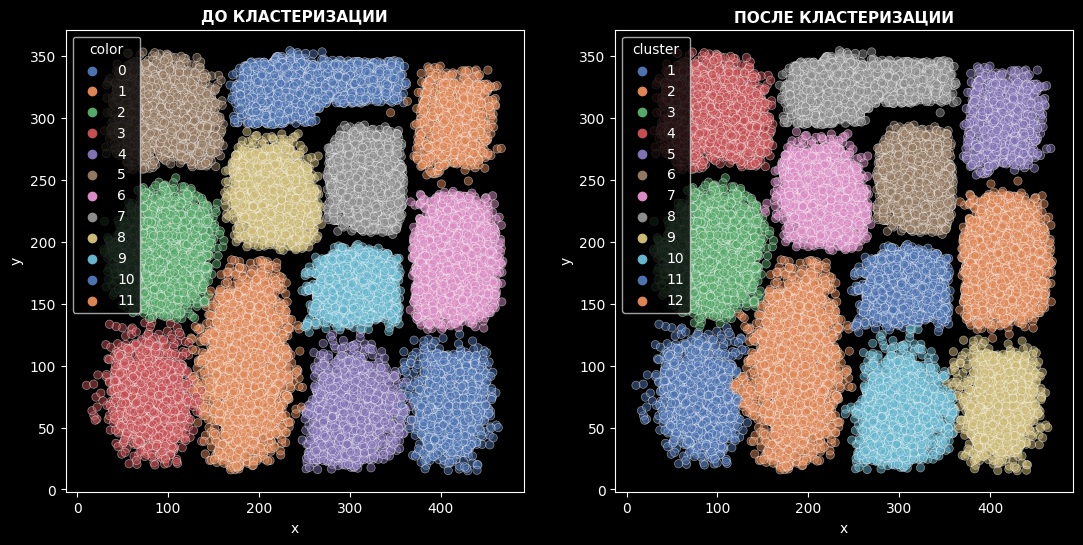

In [233]:
# Сравнение диаграмм рассеяния до и после кластеризации
fig, (ax1, ax2) = plt.subplots(figsize = (13, 6), nrows = 1, ncols = 2)
sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'color', palette = 'deep', alpha = .5, ax = ax1)
sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'cluster', palette = 'deep', alpha = .5, ax = ax2)
ax1.set_title('ДО КЛАСТЕРИЗАЦИИ', fontsize = 11, fontweight = 800)
ax2.set_title('ПОСЛЕ КЛАСТЕРИЗАЦИИ', fontsize = 11, fontweight = 800)

In [234]:
# Посмотрим сколько элементов в каждом кластере
df['cluster'].value_counts()

2     2536
12    2501
6     1985
10    1846
7     1828
8     1812
4     1793
3     1778
11    1646
9     1568
1     1378
5      929
Name: cluster, dtype: int64

In [235]:
# Выведем таблицу сопряженностей для сравнения кластеризации
table = pd.crosstab(df['cluster'], df['color'])
table

color      0     1     2     3     4     5     6     7     8     9     10   11
cluster                                                                       
1           0     5     0  1373     0     0     0     0     0     0     0    0
2           0  2502     3    31     0     0     0     0     0     0     0    0
3           0     3  1771     4     0     0     0     0     0     0     0    0
4           0     0     0     0     0  1793     0     0     0     0     0    0
5           0     0     0     0     0     0     0     0     0     0     0  929
6           0     0     0     0     0     0     0  1985     0     0     0    0
7           0     0     3     0     0     0     0     0  1825     0     0    0
8           0     0     0     0     0     0     0     0     0     0  1810    2
9        1562     0     0     0     6     0     0     0     0     0     0    0
10          5     3     0     0  1835     0     0     0     0     3     0    0
11          0     0     0     0     0     0     0     0     0  1646     0    0
12          2     0     0     0     0     0  2497     0     0     0     0    2

## Пример 5 (DBSCAN)

In [236]:
# Читаем данные
df = pd.read_csv('isolation.csv')
df.head()

x           y  color
0  257.431260  345.345735      0
1  317.520132  234.087272      2
2  227.093467   64.139227      0
3  148.855905  174.524528      1
4  419.977732  315.164370      0

In [237]:
# Состав кластеров по умолчанию
df['color'].value_counts()

1    232
2    161
0     71
Name: color, dtype: int64

In [238]:
df_work = df.iloc[:, :-1]
df_work.head()

x           y
0  257.431260  345.345735
1  317.520132  234.087272
2  227.093467   64.139227
3  148.855905  174.524528
4  419.977732  315.164370

In [240]:
# Проводим стандартизацию
X = norm.fit_transform(df_work)

In [241]:
# Преобразуем полученный массив данных в объект pandas
X = pd.DataFrame(X, index = df_work.index, columns = df_work.columns)
X.head()

x         y
0  0.356731  2.975107
1  1.024593  0.763155
2  0.019539 -2.615616
3 -0.850038 -0.421023
4  2.163366  2.375066

In [279]:
# Импортируем библиотеки
from sklearn.cluster import DBSCAN

In [280]:
# Инициализируем модель со значениями по умолчанию
db_scan_1 = DBSCAN().fit(X)

In [281]:
# Смотрим как прошла кластеризация
pd.Series(db_scan_1.labels_).value_counts()

 1    235
 0    162
-1     41
 2     15
 4      6
 3      5
dtype: int64

In [298]:
# Инициализируем модель и подбираем значения до тех пор, пока нас не устроит результат кластеризации
db_scan_2 = DBSCAN(eps = 0.2,                 # радиус сферы
                   min_samples = 8,           # мин. кол-во элементов в сфере
                   metric = 'euclidean',
                   algorithm = 'auto').fit(X)

# Смотрим как прошла кластеризация
pd.Series(db_scan_2.labels_).value_counts()

 1    232
 0    161
-1     71
dtype: int64

In [303]:
# Кол-во элементов в кластерах совпало с исходными

In [299]:
# Добавим столбец cluster с номерами кластеров в исходную таблицу
df['cluster'] = db_scan_2.labels_

Text(0.5, 1.0, 'ПОСЛЕ КЛАСТЕРИЗАЦИИ')

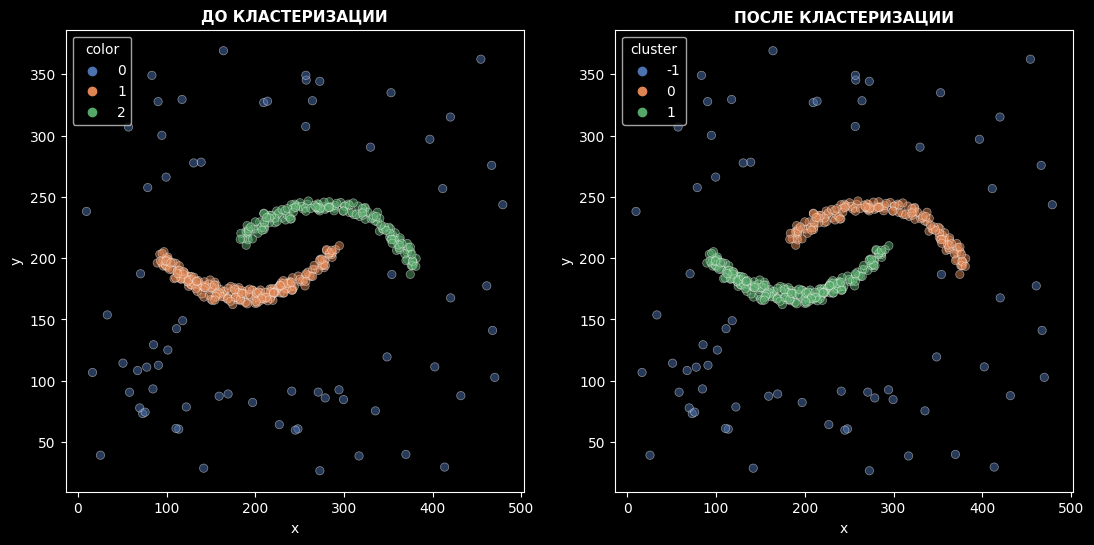

In [300]:
# Сравнение диаграмм рассеяния до и после кластеризации
fig, (ax1, ax2) = plt.subplots(figsize = (13, 6), nrows = 1, ncols = 2)
sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'color', palette = 'deep', alpha = .5, ax = ax1)
sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'cluster', palette = 'deep', alpha = .5, ax = ax2)
ax1.set_title('ДО КЛАСТЕРИЗАЦИИ', fontsize = 11, fontweight = 800)
ax2.set_title('ПОСЛЕ КЛАСТЕРИЗАЦИИ', fontsize = 11, fontweight = 800)

In [302]:
# Выведем таблицу сопряженностей для сравнения кластеризации
table = pd.crosstab(df['cluster'], df['color'])
table

color     0    1    2
cluster              
-1       71    0    0
 0        0    0  161
 1        0  232    0

## Пример 6 (WARD)

In [304]:
# Читаем данные
df = pd.read_csv('network.csv')
df.head()

x           y  color
0   67.032380  131.777258      2
1  412.517529  156.706716      1
2  109.730290  364.408237      4
3  448.511829  343.291836      3
4  405.997147  128.725708      1

In [305]:
# Состав кластеров по умолчанию
df['color'].value_counts()

1    892
2    534
0    430
3    392
4    386
Name: color, dtype: int64

In [306]:
df_work = df.iloc[:, :-1]
df_work.head()

x           y
0   67.032380  131.777258
1  412.517529  156.706716
2  109.730290  364.408237
3  448.511829  343.291836
4  405.997147  128.725708

In [307]:
# Проводим стандартизацию
X = norm.fit_transform(df_work)

In [308]:
# Преобразуем полученный массив данных в объект pandas
X = pd.DataFrame(X, index = df_work.index, columns = df_work.columns)
X.head()

x         y
0 -1.531517 -0.871120
1  0.848431 -0.644307
2 -1.237383  1.245395
3  1.096386  1.053274
4  0.803514 -0.898883

In [329]:
# Кластеризуем
link = linkage(X, method = 'ward', metric = 'euclidean')

# method = 'single'    - метод ближайшего соседа
# method = 'complete'  - метод дальнего соседа
# method = 'average'   - метод невзвешенных парных групп со средним арифметическим (UPGMA)
# method = 'weighted'  - метод взвешенных парных групп со средним арифметическим (WPGMA)
# method = 'centroid'  - метод невзвешенных парных групп с центроидами (UPGMC)
# method = 'median'    - метод взвешенных парных групп с медоидами (WPGMC)
# method = 'ward'      - метод Уорда

# metrics:
# braycurtis, canberra, chebyshev, cityblock,
# correlation, cosine, dice, euclidean, hamming,
# jaccard, jensenshannon, kulczynski1, mahalanobis,
# matching, minkowski, rogerstanimoto, russellrao,
# seuclidean, sokalmichener, sokalsneath, sqeuclidean, yule

Text(0, 0.5, 'РАССТОЯНИЕ ОБЪЕДИНЕНИЯ')

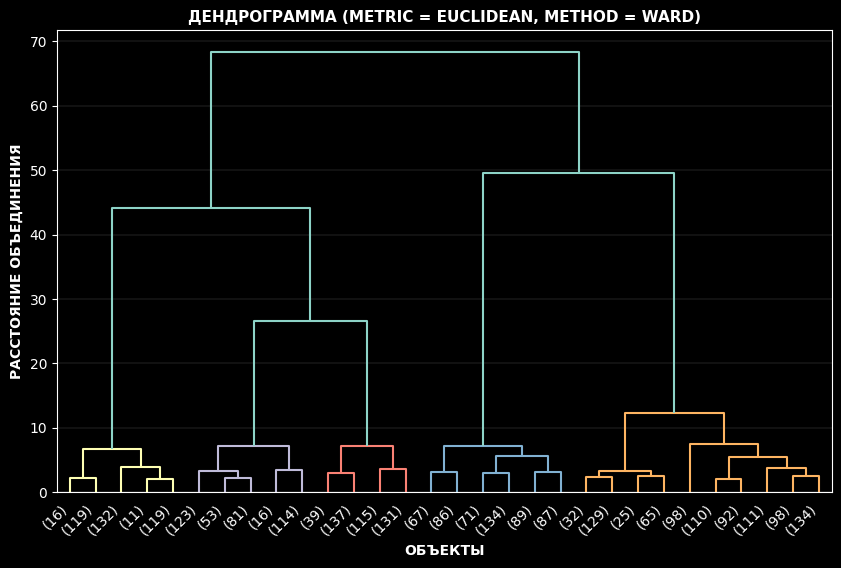

In [336]:
# Строим дендрограмму
fig, ax = plt.subplots(figsize = (10, 6))
# ax.set(ylim = (0, 150), yticks = np.arange(0, 150, 20))
ax.set_xticklabels(labels = 'x', rotation = 45, ha = 'right')
ax.grid(axis = 'y', color = 'white', linestyle = '-', linewidth = 0.1)
dn = dendrogram(link,
                labels = X.index.tolist(),
                color_threshold = 15.2,               # - указываем где разграничить по цветам (-1 не раскрашивать)
                truncate_mode = 'lastp')            # - более красивая визуализация слишком ветвистых кластеров
ax.set_title('ДЕНДРОГРАММА (METRIC = EUCLIDEAN, METHOD = WARD)', fontsize = 11, fontweight = 800)
ax.set_xlabel('ОБЪЕКТЫ', fontsize = 10, fontweight = 800)
ax.set_ylabel('РАССТОЯНИЕ ОБЪЕДИНЕНИЯ', fontsize = 10, fontweight = 800)

In [332]:
# Добавим столбец cluster с номерами кластеров в исходную таблицу и укажем когда прекратить объединение
df['cluster'] = fcluster(link, 5, criterion = 'maxclust')

Text(0.5, 1.0, 'ПОСЛЕ КЛАСТЕРИЗАЦИИ')

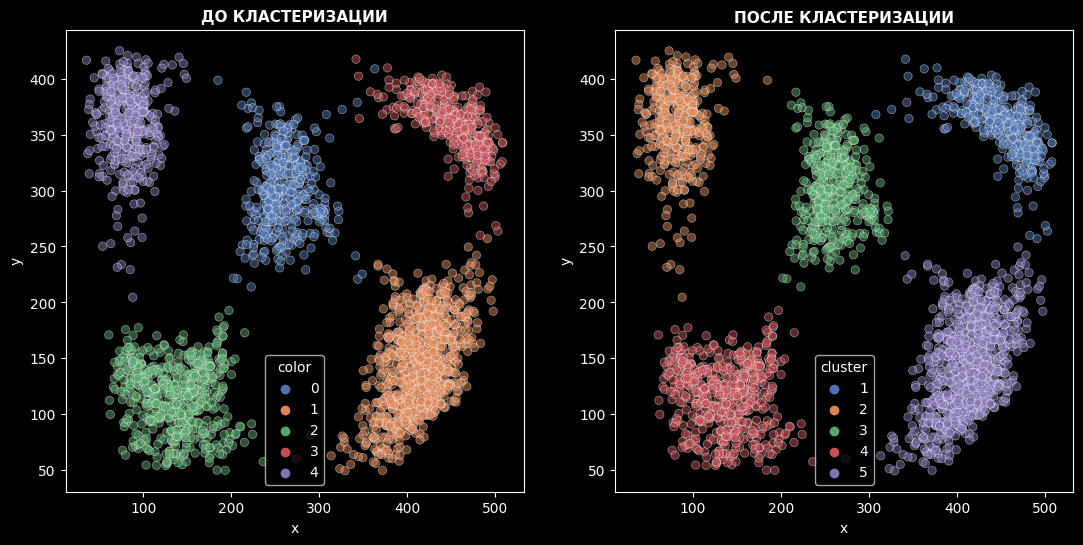

In [333]:
# Сравнение диаграмм рассеяния до и после кластеризации
fig, (ax1, ax2) = plt.subplots(figsize = (13, 6), nrows = 1, ncols = 2)
sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'color', palette = 'deep', alpha = .5, ax = ax1)
sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'cluster', palette = 'deep', alpha = .5, ax = ax2)
ax1.set_title('ДО КЛАСТЕРИЗАЦИИ', fontsize = 11, fontweight = 800)
ax2.set_title('ПОСЛЕ КЛАСТЕРИЗАЦИИ', fontsize = 11, fontweight = 800)

In [334]:
# Посмотрим сколько элементов в каждом кластере
df['cluster'].value_counts()

5    894
4    534
3    422
1    397
2    387
Name: cluster, dtype: int64

In [335]:
# Выведем таблицу сопряженностей для сравнения кластеризации
table = pd.crosstab(df['cluster'], df['color'])
table

color      0    1    2    3    4
cluster                         
1          4    1    0  392    0
2          1    0    0    0  386
3        422    0    0    0    0
4          0    0  534    0    0
5          3  891    0    0    0

## Пример 7 (DBSCAN)

In [338]:
# Читаем данные
df = pd.read_csv('spiral2.csv')
df.head()

x           y  color
0  281.762010  186.024837      1
1  212.503675  199.031585      0
2  180.014895  259.379060      0
3  302.372404  284.465182      0
4  328.759727  176.945518      1

In [339]:
# Состав кластеров по умолчанию
df['color'].value_counts()

0    4735
1    4590
Name: color, dtype: int64

In [340]:
df_work = df.iloc[:, :-1]
df_work.head()

x           y
0  281.762010  186.024837
1  212.503675  199.031585
2  180.014895  259.379060
3  302.372404  284.465182
4  328.759727  176.945518

In [341]:
# Проводим стандартизацию
X = norm.fit_transform(df_work)

In [342]:
# Преобразуем полученный массив данных в объект pandas
X = pd.DataFrame(X, index = df_work.index, columns = df_work.columns)
X.head()

x         y
0  0.055128 -0.473369
1 -1.100094 -0.269705
2 -1.642003  0.675239
3  0.398907  1.068046
4  0.839044 -0.615536

In [380]:
# Инициализируем модель со значениями по умолчанию
db_scan_1 = DBSCAN().fit(X)

In [381]:
# Смотрим как прошла кластеризация
pd.Series(db_scan_1.labels_).value_counts()

0    9325
dtype: int64

In [424]:
# Инициализируем модель и подбираем значения до тех пор, пока нас не устроит результат кластеризации
db_scan_2 = DBSCAN(eps = 0.09,                 # радиус сферы
                   min_samples = 5,           # мин. кол-во элементов в сфере
                   metric = 'euclidean',
                   algorithm = 'brute').fit(X)

# Смотрим как прошла кластеризация
pd.Series(db_scan_2.labels_).value_counts()

 1    4705
 0    4572
-1      48
dtype: int64

In [425]:
# Добавим столбец cluster с номерами кластеров в исходную таблицу
df['cluster'] = db_scan_2.labels_

Text(0.5, 1.0, 'ПОСЛЕ КЛАСТЕРИЗАЦИИ')

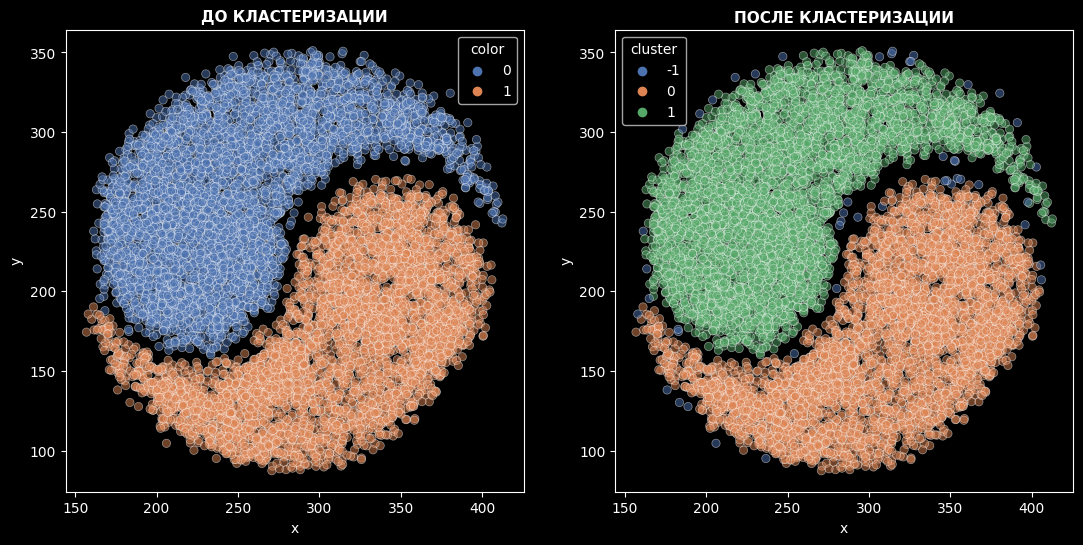

In [426]:
# Сравнение диаграмм рассеяния до и после кластеризации
fig, (ax1, ax2) = plt.subplots(figsize = (13, 6), nrows = 1, ncols = 2)
sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'color', palette = 'deep', alpha = .5, ax = ax1)
sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'cluster', palette = 'deep', alpha = .5, ax = ax2)
ax1.set_title('ДО КЛАСТЕРИЗАЦИИ', fontsize = 11, fontweight = 800)
ax2.set_title('ПОСЛЕ КЛАСТЕРИЗАЦИИ', fontsize = 11, fontweight = 800)

In [427]:
# Выведем таблицу сопряженностей для сравнения кластеризации
table = pd.crosstab(df['cluster'], df['color'])
table

color       0     1
cluster            
-1         29    19
 0          1  4571
 1       4705     0

## Пример 8 (WARD)

In [428]:
# Читаем данные
df = pd.read_csv('supernova.csv')
df.head()

x           y  color
0  202.207191  333.390000      1
1  214.424501  374.531029      1
2  476.317977  255.623373      3
3  237.659471  148.173931      2
4  201.959301  355.790748      1

In [429]:
# Состав кластеров по умолчанию
df['color'].value_counts()

3    3021
2    2672
0    2570
1    2451
Name: color, dtype: int64

In [430]:
df_work = df.iloc[:, :-1]
df_work.head()

x           y
0  202.207191  333.390000
1  214.424501  374.531029
2  476.317977  255.623373
3  237.659471  148.173931
4  201.959301  355.790748

In [431]:
# Проводим стандартизацию
X = norm.fit_transform(df_work)

In [432]:
# Преобразуем полученный массив данных в объект pandas
X = pd.DataFrame(X, index = df_work.index, columns = df_work.columns)
X.head()

x         y
0 -1.229727  0.409678
1 -1.093852  0.791658
2  1.818799 -0.312357
3 -0.835444 -1.309986
4 -1.232484  0.617661

In [483]:
# Кластеризуем
link = linkage(X, method = 'ward', metric = 'euclidean')

# method = 'single'    - метод ближайшего соседа
# method = 'complete'  - метод дальнего соседа
# method = 'average'   - метод невзвешенных парных групп со средним арифметическим (UPGMA)
# method = 'weighted'  - метод взвешенных парных групп со средним арифметическим (WPGMA)
# method = 'centroid'  - метод невзвешенных парных групп с центроидами (UPGMC)
# method = 'median'    - метод взвешенных парных групп с медоидами (WPGMC)
# method = 'ward'      - метод Уорда

# metrics:
# braycurtis, canberra, chebyshev, cityblock,
# correlation, cosine, dice, euclidean, hamming,
# jaccard, jensenshannon, kulczynski1, mahalanobis,
# matching, minkowski, rogerstanimoto, russellrao,
# seuclidean, sokalmichener, sokalsneath, sqeuclidean, yule

Text(0, 0.5, 'РАССТОЯНИЕ ОБЪЕДИНЕНИЯ')

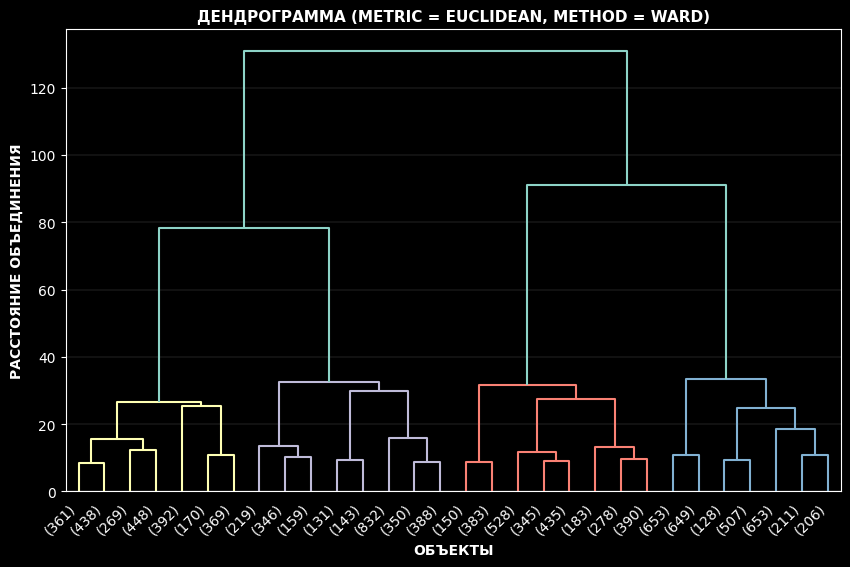

In [485]:
# Строим дендрограмму
fig, ax = plt.subplots(figsize = (10, 6))
# ax.set(ylim = (0, 150), yticks = np.arange(0, 150, 20))
ax.set_xticklabels(labels = 'x', rotation = 45, ha = 'right')
ax.grid(axis = 'y', color = 'white', linestyle = '-', linewidth = 0.1)
dn = dendrogram(link,
                labels = X.index.tolist(),
                color_threshold = 60.0,               # - указываем где разграничить по цветам (-1 не раскрашивать)
                truncate_mode = 'lastp')            # - более красивая визуализация слишком ветвистых кластеров
ax.set_title('ДЕНДРОГРАММА (METRIC = EUCLIDEAN, METHOD = WARD)', fontsize = 11, fontweight = 800)
ax.set_xlabel('ОБЪЕКТЫ', fontsize = 10, fontweight = 800)
ax.set_ylabel('РАССТОЯНИЕ ОБЪЕДИНЕНИЯ', fontsize = 10, fontweight = 800)

In [486]:
# Добавим столбец cluster с номерами кластеров в исходную таблицу и укажем когда прекратить объединение
df['cluster'] = fcluster(link, 4, criterion = 'maxclust')

Text(0.5, 1.0, 'ПОСЛЕ КЛАСТЕРИЗАЦИИ')

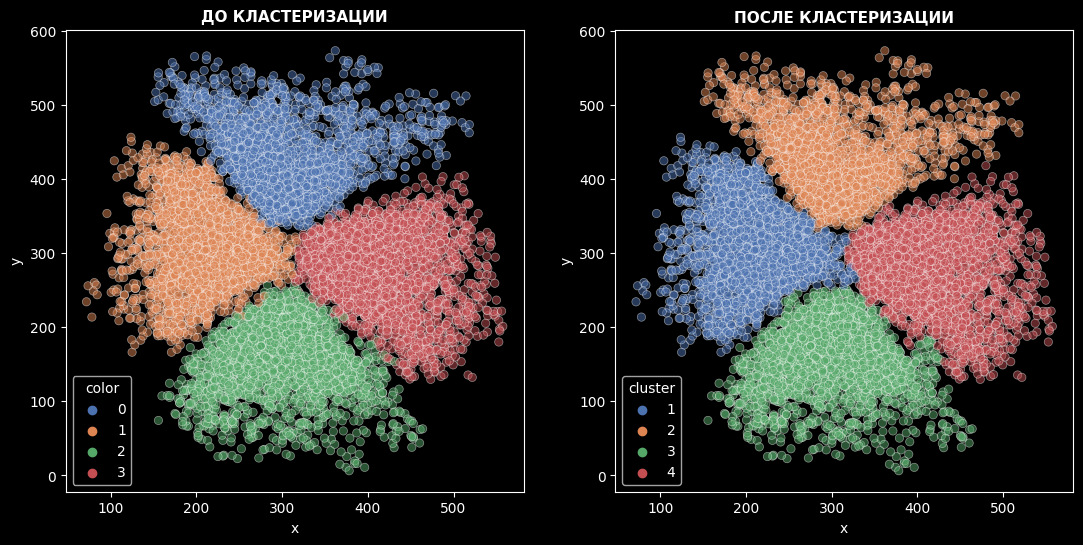

In [487]:
# Сравнение диаграмм рассеяния до и после кластеризации
fig, (ax1, ax2) = plt.subplots(figsize = (13, 6), nrows = 1, ncols = 2)
sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'color', palette = 'deep', alpha = .5, ax = ax1)
sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'cluster', palette = 'deep', alpha = .5, ax = ax2)
ax1.set_title('ДО КЛАСТЕРИЗАЦИИ', fontsize = 11, fontweight = 800)
ax2.set_title('ПОСЛЕ КЛАСТЕРИЗАЦИИ', fontsize = 11, fontweight = 800)

In [488]:
# Посмотрим сколько элементов в каждом кластере
df['cluster'].value_counts()

4    3007
3    2692
2    2568
1    2447
Name: cluster, dtype: int64

In [489]:
# Выведем таблицу сопряженностей для сравнения кластеризации
table = pd.crosstab(df['cluster'], df['color'])
table

color       0     1     2     3
cluster                        
1           3  2429     2    13
2        2562     6     0     0
3           0    16  2663    13
4           5     0     7  2995